In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os

company_names = ['AAPL', 'GOOGL', 'MSFT', 'NFLX']
save_path = "/Users/boragoksal/PycharmProjects/FinDataAnalysis/data/raw/"

for company in company_names:
    file_path = os.path.join(save_path, f"{company}.csv")
    globals()[company] = pd.read_csv(file_path)
    globals()[company]['Date'] = pd.to_datetime(globals()[company]['Date'])

AAPL.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-02 00:00:00+00:00,40.524349,43.064999,43.075001,42.314999,42.540001,102223600
1,2018-01-03 00:00:00+00:00,40.517281,43.057499,43.637501,42.990002,43.132500,118071600
2,2018-01-04 00:00:00+00:00,40.705494,43.257500,43.367500,43.020000,43.134998,89738400
3,2018-01-05 00:00:00+00:00,41.168930,43.750000,43.842499,43.262501,43.360001,94640000
4,2018-01-08 00:00:00+00:00,41.016018,43.587502,43.902500,43.482498,43.587502,82271200


In [5]:
#Creating a company key for the combined_df
AAPL['Company'] = 'AAPL'
GOOGL['Company'] = 'GOOGL'
MSFT['Company'] = 'MSFT'
NFLX['Company'] = 'NFLX'

#combining datasets
combined_df = pd.concat([AAPL,GOOGL,MSFT,NFLX])

#can now check for any null values across all datasets
combined_df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Company      0
dtype: int64

In [6]:
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1.759000e+03
mean,122.254891,124.132733,125.365671,122.759315,124.007604,1.002148e+08
std,59.260025,58.820557,59.288977,58.257247,58.746596,5.521072e+07
min,33.952545,35.547501,36.430000,35.500000,35.994999,2.323470e+07
25%,54.304974,56.761250,57.256248,56.434999,56.897499,6.311420e+07
50%,132.000671,134.509995,135.990005,133.320007,134.789993,8.678120e+07
75%,169.405006,170.810005,172.629997,169.404999,170.940002,1.214833e+08
max,259.019989,259.019989,260.100006,257.630005,258.190002,4.265100e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1759 non-null   datetime64[ns, UTC]
 1   Adj Close  1759 non-null   float64            
 2   Close      1759 non-null   float64            
 3   High       1759 non-null   float64            
 4   Low        1759 non-null   float64            
 5   Open       1759 non-null   float64            
 6   Volume     1759 non-null   int64              
 7   Company    1759 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [13]:
def company_subplot(x,y):
    
    plt.figure(figsize = (15,10))
    plt.subplots_adjust(top=2.25, bottom = 1.2) 

    companys = [AAPL,GOOGL,MSFT,NFLX]
    company_names = ["APPLE","GOOGLE", "MICROSOFT", "NETFLIX"]
    colours = ['blue', 'orange', 'green', 'red']

    for i, company in enumerate(companys, 1):
        plt.subplot(2,2,i)
        plt.plot(company[x], company[y])
        plt.ylabel(f'{y}')
        plt.xlabel(None)
       
        if y == 'Volume':
            plt.title(f"Sales {y} for {company_names[i-1]}")
        elif y in ['Adj Close', 'High', 'Low', 'Open', 'Close']:
            plt.title(f"{y} price for {company_names[i-1]}")
            
    plt.tight_layout()

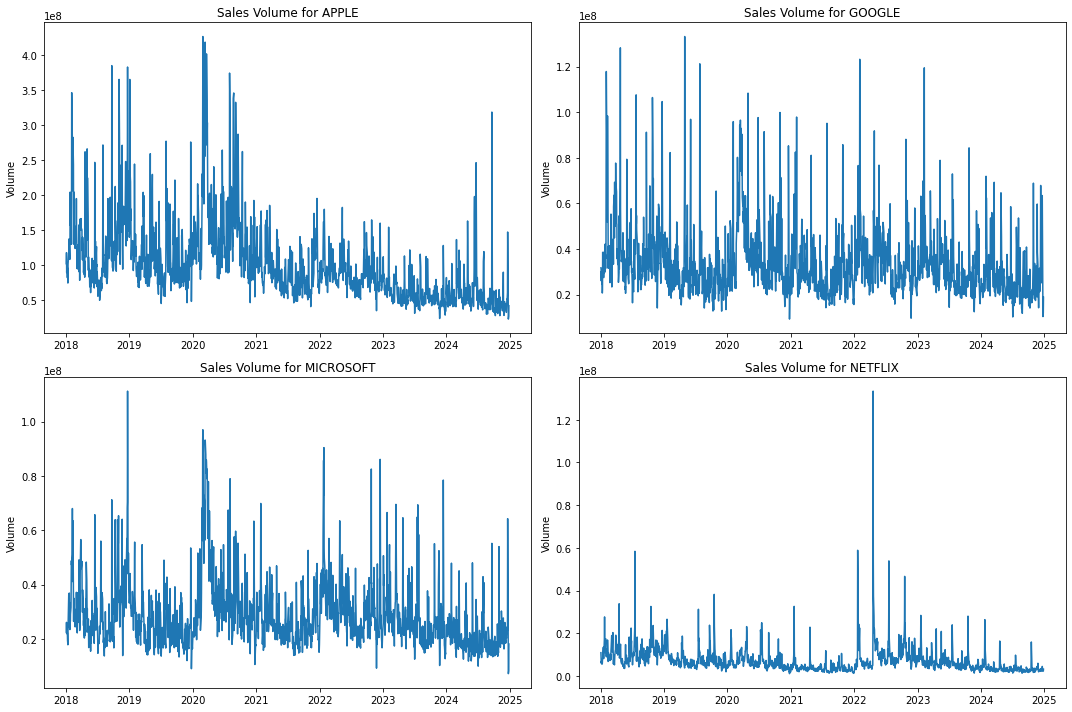

In [14]:
company_subplot('Date','Volume')

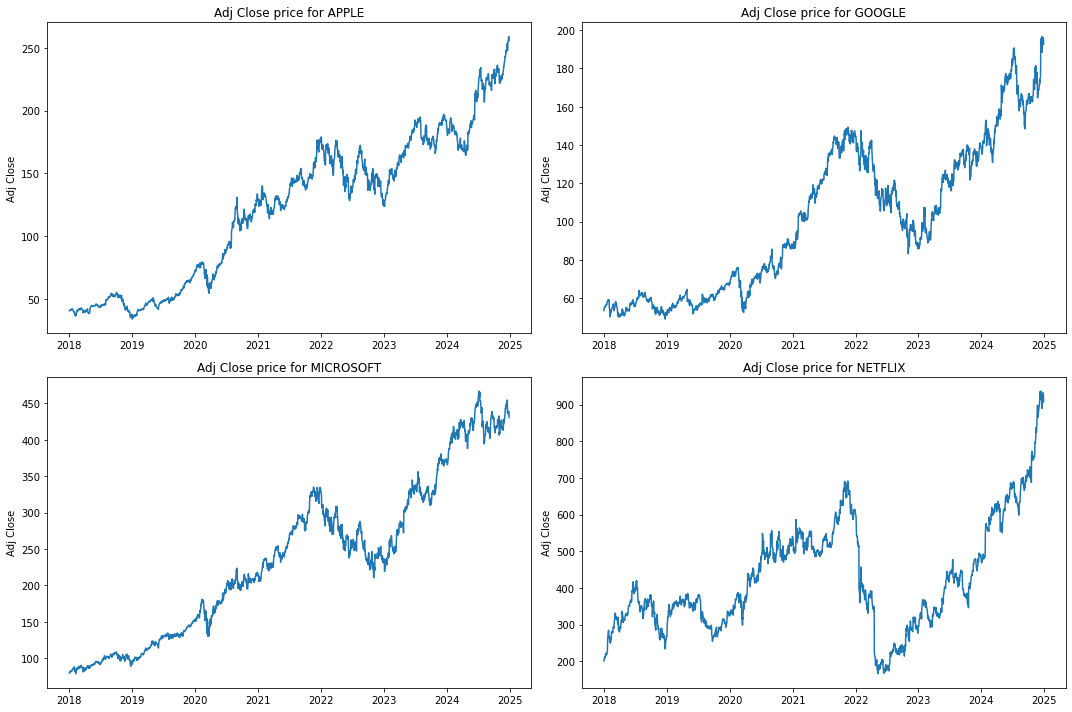

In [15]:
company_subplot('Date','Adj Close')